In [29]:
import scipy.stats as stats

def get_t_critical_value(confidence_level, n):
    df = n - 1  # Degrees of freedom
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha / 2, df)  # two-tailed
    return round(t_critical, 4)

# Test cases
print("a) 95%, n = 19, t-critical:", get_t_critical_value(0.95, 19))
print("b) 90%, n = 27, t-critical:", get_t_critical_value(0.90, 27))
print("c) 80%, n = 7, t-critical:", get_t_critical_value(0.80, 7))


a) 95%, n = 19, t-critical: 2.1009
b) 90%, n = 27, t-critical: 1.7056
c) 80%, n = 7, t-critical: 1.4398


In [30]:
import math
from scipy.stats import norm

def required_sample_size(confidence_level, sigma, margin_or_width, is_width=True):

    E = margin_or_width / 2 if is_width else margin_or_width
    alpha = 1 - confidence_level
    z = norm.ppf(1 - alpha / 2)
    n = (z * sigma / E) ** 2
    return math.ceil(n)


In [31]:
# (a) σ = 4, 90% CI, width = 10 → E = 5
a = required_sample_size(confidence_level=0.90, sigma=4, margin_or_width=10, is_width=True)

# (b) σ = 12, 98% CI, width = 15 → E = 7.5
b = required_sample_size(confidence_level=0.98, sigma=12, margin_or_width=15, is_width=True)

# (c) σ = 2, 92% CI, margin = 5
c = required_sample_size(confidence_level=0.92, sigma=2, margin_or_width=5, is_width=False)

# (d) σ = 10, 99% CI, margin = 3
d = required_sample_size(confidence_level=0.99, sigma=10, margin_or_width=3, is_width=False)

# Print results
print(f"(a) Required sample size: {a}")
print(f"(b) Required sample size: {b}")
print(f"(c) Required sample size: {c}")
print(f"(d) Required sample size: {d}")



(a) Required sample size: 2
(b) Required sample size: 14
(c) Required sample size: 1
(d) Required sample size: 74


### 2.1 Conceptual Understanding

1. Define Maximum Likelihood Estimation (MLE). How does it differ from the Method of Moments (MoM)?

**Maximum Likelihood Estimation (MLE)**

- MLE is a statistical method for estimating the parameters of a probability distribution by maximizing the likelihood function i.e., finding the parameter values that make the observed data most probable.
- Given data x1,x2,x3...,xn from a distribution with parameter θ, the likelihood function is:

  L(θ)=i=1∏n​f(xi​;θ)
  where
𝑓
(
𝑥
𝑖
;
𝜃
)
f(x
i
	​

  ;θ) is the probability density (or mass) function.

| Feature         | MLE                                                                           | Method of Moments                                                    |
| --------------- | ----------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **Approach**    | Finds parameters that maximize the likelihood of observing the sample data    | Equates theoretical moments (mean, variance, etc.) to sample moments |
| **Objective**   | Best explains the *exact sample values* observed                              | Matches general distributional shape via moments                     |
| **Efficiency**  | Asymptotically efficient (achieves minimum variance) under regular conditions | May be less efficient                                                |
| **Computation** | Can be more complex, often requiring calculus                                 | Usually simpler, just solving equations from moment equalities       |



---

2. Why is the logarithm of the likelihood function typically used when performing MLE? What are its advantages?

  We define the log-likelihood function as:

  ℓ(θ)=lnL(θ)=i=1∑n​lnf(xi​;θ)

  **Advantages of using the log-likelihood:**
  - Simplifies products into sums avoids numerical underflow when multiplying many small probabilities.

 - Easier differentiation derivatives of sums are simpler than derivatives of products.

 - Same maximizer since
ln
⁡
(
⋅
)
ln(⋅) is strictly increasing, maximizing
𝐿
(
𝜃
)
L(θ) is equivalent to maximizing
ℓ
(
𝜃
)
ℓ(θ).

  - Better numerical stability  especially for large
  𝑛
  n, working in log space avoids extremely small or large intermediate values.



---

3. Suppose we observe a sample of customer inter-arrival times that follow an exponential distribution.
What parameter would you estimate using MLE, and what would the likelihood function look like?

  Given:

  Inter-arrival times
  𝑥
  1
  ,
  𝑥
  2
  ,
  …
  ,
  𝑥
  𝑛
  x
  1
    ​

  ,x
  2
    ​

  ,…,x
  n
    ​


  Exponential PDF:

  𝑓
  (
  𝑥
  ;
  𝜆
  )
  =
  𝜆
  𝑒
  −
  𝜆
  𝑥
  ,
  𝑥
  ≥
  0
  f(x;λ)=λe
  −λx
  ,x≥0

  where
  𝜆
  >
  0
  λ>0 is the rate parameter.

  Parameter to estimate:

  The rate parameter
  𝜆
  λ.

  Likelihood function:

  𝐿
  (
  𝜆
  )
  =
  ∏
  𝑖
  =
  1
  𝑛
  𝜆
  𝑒
  −
  𝜆
  𝑥
  𝑖
  L(λ)=
  i=1
  ∏
  n
    ​

  λe
  −λx
  i
    ​

  =
  𝜆
  𝑛
  𝑒
  −
  𝜆
  ∑
  𝑖
  =
  1
  𝑛
  𝑥
  𝑖
  =λ
  n
  e
  −λ∑
  i=1
  n
    ​

  x
  i
    ​


  Log-likelihood function:

  ℓ
  (
  𝜆
  )
  =
  𝑛
  ln
  ⁡
  𝜆
  −
  𝜆
  ∑
  𝑖
  =
  1
  𝑛
  𝑥
  𝑖
  ℓ(λ)=nlnλ−λ
  i=1
  ∑
  n
    ​

x
i
	​


MLE estimate:

𝑑
ℓ
𝑑
𝜆
=
𝑛
𝜆
−
∑
𝑖
=
1
𝑛
𝑥
𝑖
=
0
dλ
dℓ
	​

=
λ
n
	​

−
i=1
∑
n
	​

x
i
	​

=0
𝜆
^
=
𝑛
∑
𝑖
=
1
𝑛
𝑥
𝑖
=
1
𝑥
ˉ
λ
^
=
∑
i=1
n
	​

x
i
	​

n
	​

=
x
ˉ
1
	​



In [32]:
import math

# Given values
n = 40
x_bar = 12      # mean in %
s = 3           # std deviation in %
confidence = 0.95

# Since n >= 30, use z-critical for 95%
z = 1.96

# Standard Error
SE = s / math.sqrt(n)

# Margin of Error
ME = z * SE

# Confidence Interval
lower = x_bar - ME
upper = x_bar + ME

print(f"Standard Error (SE): {SE:.3f}%")
print(f"Margin of Error (ME): {ME:.3f}%")
print(f"95% Confidence Interval: ({lower:.2f}%, {upper:.2f}%)")


Standard Error (SE): 0.474%
Margin of Error (ME): 0.930%
95% Confidence Interval: (11.07%, 12.93%)


In [33]:
import math
from scipy import stats

# Given data
n = 36
x_bar = 14       # sample mean (mpg)
s = 2            # sample standard deviation (mpg)
confidence = 0.90

# Since n >= 30, we can use z, but let's use t to be exact
df = n - 1  # degrees of freedom
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df)

# Standard Error
SE = s / math.sqrt(n)

# Margin of Error
ME = t_crit * SE

# Confidence Interval
lower = x_bar - ME
upper = x_bar + ME

print(f"t-critical value: {t_crit:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Margin of Error (ME): {ME:.4f}")
print(f"{int(confidence*100)}% Confidence Interval: ({lower:.2f} mpg, {upper:.2f} mpg)")


t-critical value: 1.6896
Standard Error (SE): 0.3333
Margin of Error (ME): 0.5632
90% Confidence Interval: (13.44 mpg, 14.56 mpg)


In [34]:
import math
from scipy import stats

# Given data
n = 300
x = 240
p_hat = x / n  # sample proportion
confidence = 0.95

# z-critical value for 95% confidence
z_crit = stats.norm.ppf(1 - (1 - confidence) / 2)

# Standard Error for proportion
SE = math.sqrt(p_hat * (1 - p_hat) / n)

# Margin of Error
ME = z_crit * SE

# Confidence Interval
lower = p_hat - ME
upper = p_hat + ME

print(f"Sample proportion (p̂): {p_hat:.3f}")
print(f"z-critical value: {z_crit:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Margin of Error (ME): {ME:.4f}")
print(f"{int(confidence*100)}% Confidence Interval: ({lower:.3f}, {upper:.3f})")
print(f"In percentage: ({lower*100:.2f}%, {upper*100:.2f}%)")


Sample proportion (p̂): 0.800
z-critical value: 1.9600
Standard Error (SE): 0.0231
Margin of Error (ME): 0.0453
95% Confidence Interval: (0.755, 0.845)
In percentage: (75.47%, 84.53%)


In [35]:
import math
from scipy import stats

# Given data
n = 25
x_bar = 3400      # sample mean
s = 600           # sample standard deviation
confidence = 0.99

# Degrees of freedom
df = n - 1
alpha = 1 - confidence

# t-critical value for 99% CI
t_crit = stats.t.ppf(1 - alpha/2, df)

# Standard Error
SE = s / math.sqrt(n)

# Margin of Error
ME = t_crit * SE

# Confidence Interval
lower = x_bar - ME
upper = x_bar + ME

print(f"t-critical value: {t_crit:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"Margin of Error (ME): {ME:.4f}")
print(f"{int(confidence*100)}% Confidence Interval: ({lower:.2f}, {upper:.2f})")


t-critical value: 2.7969
Standard Error (SE): 120.0000
Margin of Error (ME): 335.6327
99% Confidence Interval: (3064.37, 3735.63)


In [36]:
import math
from scipy import stats

# ==== GIVEN DATA ====
n = 20
x_bar = 107.3  # sample mean
s = 13.7       # sample standard deviation
df = n - 1
SE = s / math.sqrt(n)

print("(a) Use t or z?")
print("Since sigma is unknown and n is small (<30), use t-distribution with df =", df)

# --- (b) 95% CI ---
confidence_95 = 0.95
alpha_95 = 1 - confidence_95
t_crit_95 = stats.t.ppf(1 - alpha_95/2, df)
ME_95 = t_crit_95 * SE
lower_95 = x_bar - ME_95
upper_95 = x_bar + ME_95
print("\n(b) 95% CI:")
print(f"t-critical (95%): {t_crit_95:.4f}")
print(f"Standard Error: {SE:.4f}")
print(f"Margin of Error: {ME_95:.4f}")
print(f"95% CI: ({lower_95:.2f}, {upper_95:.2f})")
print("Interpretation: We are 95% confident the true mean eggs per nest lies between "
      f"{lower_95:.2f} and {upper_95:.2f}.")

# --- (c) 98% CI ---
confidence_98 = 0.98
alpha_98 = 1 - confidence_98
t_crit_98 = stats.t.ppf(1 - alpha_98/2, df)
ME_98 = t_crit_98 * SE
lower_98 = x_bar - ME_98
upper_98 = x_bar + ME_98
print("\n(c) 98% CI:")
print(f"t-critical (98%): {t_crit_98:.4f}")
print(f"Margin of Error: {ME_98:.4f}")
print(f"98% CI: ({lower_98:.2f}, {upper_98:.2f})")
print("Interpretation: We are 98% confident the true mean eggs per nest lies between "
      f"{lower_98:.2f} and {upper_98:.2f}.")

# --- (d) Check if mu=105 is in the intervals ---
mu = 105
in_95 = lower_95 <= mu <= upper_95
in_98 = lower_98 <= mu <= upper_98
print("\n(d) Is mu=105 in the intervals?")
print(f"mu=105 in 95% CI? {'Yes' if in_95 else 'No'}")
print(f"mu=105 in 98% CI? {'Yes' if in_98 else 'No'}")
print("Conclusion: Both intervals captured the true mean, so they did a good job.")


(a) Use t or z?
Since sigma is unknown and n is small (<30), use t-distribution with df = 19

(b) 95% CI:
t-critical (95%): 2.0930
Standard Error: 3.0634
Margin of Error: 6.4118
95% CI: (100.89, 113.71)
Interpretation: We are 95% confident the true mean eggs per nest lies between 100.89 and 113.71.

(c) 98% CI:
t-critical (98%): 2.5395
Margin of Error: 7.7795
98% CI: (99.52, 115.08)
Interpretation: We are 98% confident the true mean eggs per nest lies between 99.52 and 115.08.

(d) Is mu=105 in the intervals?
mu=105 in 95% CI? Yes
mu=105 in 98% CI? Yes
Conclusion: Both intervals captured the true mean, so they did a good job.


In [37]:
# Problem: Commute times for 32 students
# Data: n=32, x̄=31 minutes, s=18 minutes
# Tasks:
# (a) Decide z vs t and explain.
# (b) 95% CI for mean commute time + interpretation.
# (c) 90% CI for mean commute time + interpretation.

import math
from scipy import stats

# ---- Given ----
n = 32
x_bar = 31.0
s = 18.0
df = n - 1
SE = s / math.sqrt(n)

print("(a) Should we use z or t? ")
sigma_known = False  # Population SD not given
if (not sigma_known):
    print("Use t-distribution (df = n - 1 = {}).".format(df))
    print("Reason: Population SD (σ) is unknown and we are estimating the mean from a sample.\n"
          "Even though n=32 is moderate, the correct one-sample mean interval uses t when σ is unknown.\n")
else:
    print("Use z-distribution (but this would require σ to be known).")

# Helper to format CI and interpretation
def ci_mean_t(xbar, s, n, confidence):
    df = n - 1
    alpha = 1 - confidence
    t_star = stats.t.ppf(1 - alpha/2, df)
    SE = s / math.sqrt(n)
    ME = t_star * SE
    lower, upper = xbar - ME, xbar + ME
    return t_star, SE, ME, lower, upper

# ---- (b) 95% CI ----
conf_95 = 0.95
t95, SE95, ME95, lo95, up95 = ci_mean_t(x_bar, s, n, conf_95)

print("(b) 95% Confidence Interval for the mean commute time")
print(f"Standard Error (SE) = s/√n = {SE95:.3f} minutes")
print(f"t* (df={df}, 95%) = {t95:.4f}")
print(f"Margin of Error (ME) = t* × SE = {ME95:.3f} minutes")
print(f"95% CI = ( {lo95:.2f} , {up95:.2f} ) minutes")
print(f"Interpretation: We are 95% confident the true mean commute time is between "
      f"{lo95:.2f} and {up95:.2f} minutes.\n")

# ---- (c) 90% CI ----
conf_90 = 0.90
t90, SE90, ME90, lo90, up90 = ci_mean_t(x_bar, s, n, conf_90)

print("(c) 90% Confidence Interval for the mean commute time")
print(f"Standard Error (SE) = s/√n = {SE90:.3f} minutes")
print(f"t* (df={df}, 90%) = {t90:.4f}")
print(f"Margin of Error (ME) = t* × SE = {ME90:.3f} minutes")
print(f"90% CI = ( {lo90:.2f} , {up90:.2f} ) minutes")
print(f"Interpretation: We are 90% confident the true mean commute time is between "
      f"{lo90:.2f} and {up90:.2f} minutes.")


(a) Should we use z or t? 
Use t-distribution (df = n - 1 = 31).
Reason: Population SD (σ) is unknown and we are estimating the mean from a sample.
Even though n=32 is moderate, the correct one-sample mean interval uses t when σ is unknown.

(b) 95% Confidence Interval for the mean commute time
Standard Error (SE) = s/√n = 3.182 minutes
t* (df=31, 95%) = 2.0395
Margin of Error (ME) = t* × SE = 6.490 minutes
95% CI = ( 24.51 , 37.49 ) minutes
Interpretation: We are 95% confident the true mean commute time is between 24.51 and 37.49 minutes.

(c) 90% Confidence Interval for the mean commute time
Standard Error (SE) = s/√n = 3.182 minutes
t* (df=31, 90%) = 1.6955
Margin of Error (ME) = t* × SE = 5.395 minutes
90% CI = ( 25.60 , 36.40 ) minutes
Interpretation: We are 90% confident the true mean commute time is between 25.60 and 36.40 minutes.


### 4 Confidence Interval - Coding Exercises.

In [38]:
import numpy as np
import scipy.stats as stats

# Given data
n = 50
sample_mean = 4.2
sample_std = 1.1
confidence = 0.95

# Step 1: compute the standard error
SE = sample_std / np.sqrt(n)

# Step 2: get the critical t value (two-sided)
df = n - 1
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df)

# Step 3: compute the margin of error
ME = t_crit * SE

# Step 4: build the confidence interval
lower = sample_mean - ME
upper = sample_mean + ME

print(f"Standard Error (SE): {SE:.6f} days")
print(f"t-critical (df={df}, {int(confidence*100)}%): {t_crit:.4f}")
print(f"Margin of Error (ME): {ME:.6f} days")
print(f"{int(confidence*100)}% CI for mean delivery time: ({lower:.3f}, {upper:.3f}) days")

# (Optional) Cross-check using scipy's built-in interval helper
lo2, hi2 = stats.t.interval(confidence, df, loc=sample_mean, scale=SE)
print(f"Cross-check (stats.t.interval): ({lo2:.3f}, {hi2:.3f}) days")


Standard Error (SE): 0.155563 days
t-critical (df=49, 95%): 2.0096
Margin of Error (ME): 0.312617 days
95% CI for mean delivery time: (3.887, 4.513) days
Cross-check (stats.t.interval): (3.887, 4.513) days


In [39]:
import math
from scipy import stats

# Given data
n = 400
x = 128
confidence = 0.90

# Step 1: compute sample proportion
p_hat = x / n

# Step 2: compute standard error for proportion
SE = math.sqrt(p_hat * (1 - p_hat) / n)

# Step 3: find the z critical value
alpha = 1 - confidence
z_crit = stats.norm.ppf(1 - alpha/2)

# Step 4: compute confidence interval
ME = z_crit * SE
lower = p_hat - ME
upper = p_hat + ME

print(f"Sample proportion (p̂): {p_hat:.4f}")
print(f"Standard Error (SE): {SE:.4f}")
print(f"z-critical ({int(confidence*100)}%): {z_crit:.4f}")
print(f"Margin of Error (ME): {ME:.4f}")
print(f"{int(confidence*100)}% CI for true proportion: ({lower:.4f}, {upper:.4f})")
print(f"In percentage: ({lower*100:.2f}%, {upper*100:.2f}%)")


Sample proportion (p̂): 0.3200
Standard Error (SE): 0.0233
z-critical (90%): 1.6449
Margin of Error (ME): 0.0384
90% CI for true proportion: (0.2816, 0.3584)
In percentage: (28.16%, 35.84%)


In [40]:
import math
from scipy import stats

# Given data
n1, mean1, std1 = 40, 5200, 610
n2, mean2, std2 = 35, 4900, 580
confidence = 0.95

# Step 1: compute standard error for the difference (Welch's t)
var1, var2 = std1**2, std2**2
SE_diff = math.sqrt(var1/n1 + var2/n2)

# Step 2: degrees of freedom (Welch’s approximation)
num = (var1/n1 + var2/n2)**2
den = ((var1/n1)**2) / (n1 - 1) + ((var2/n2)**2) / (n2 - 1)
df = num / den

# Step 3: get critical t value
alpha = 1 - confidence
t_crit = stats.t.ppf(1 - alpha/2, df)

# Step 4: compute confidence interval for the difference (mean1 - mean2)
diff = mean1 - mean2
ME = t_crit * SE_diff
lower = diff - ME
upper = diff + ME

print(f"Difference in means (A - B): {diff:.3f}")
print(f"Standard Error of difference: {SE_diff:.3f}")
print(f"Welch's df: {df:.3f}")
print(f"t-critical ({int(confidence*100)}%): {t_crit:.4f}")
print(f"Margin of Error: {ME:.3f}")
print(f"{int(confidence*100)}% CI for (μ_A - μ_B): ({lower:.3f}, {upper:.3f})")

# (Optional) also report whether zero is inside the CI (useful for practical significance)
contains_zero = lower <= 0 <= upper
print(f"Does the CI include 0? {'Yes' if contains_zero else 'No'}")


Difference in means (A - B): 300.000
Standard Error of difference: 137.528
Welch's df: 72.476
t-critical (95%): 1.9932
Margin of Error: 274.126
95% CI for (μ_A - μ_B): (25.874, 574.126)
Does the CI include 0? No


95% CI coverage: 96/100 (96%) intervals contain the true mean 3.6


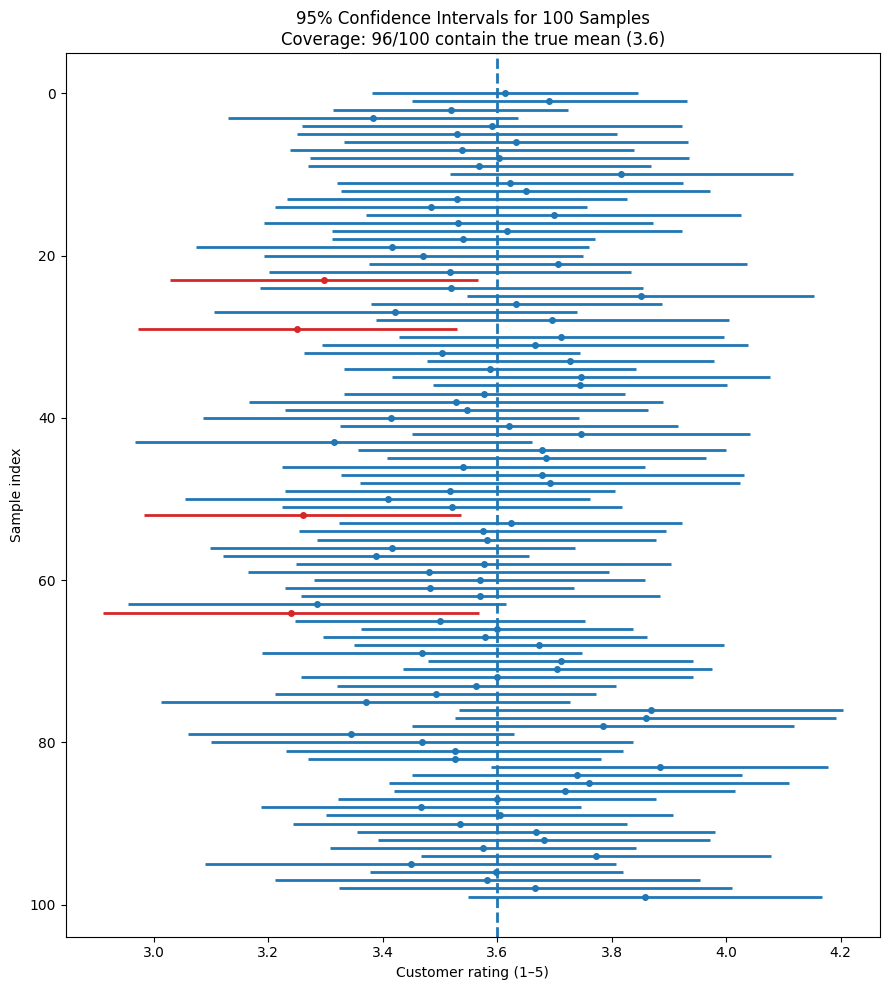

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Exercise 4 - Visualizing CIs


# Given / Settings
true_mu = 3.6
pop_sigma = 0.8      # population SD (given for simulation only)
n = 30               # sample size
n_sims = 100         # number of samples
confidence = 0.95
alpha = 1 - confidence
df = n - 1
rng = np.random.default_rng(42)  # reproducibility

# Step 1: simulate 100 samples of size 30 from N(3.6, 0.8)
# (We use the population SD for generating data; CI uses sample SD)
samples = rng.normal(loc=true_mu, scale=pop_sigma, size=(n_sims, n))

# Step 2 & 3: compute CI for each sample (t-interval), store bounds and coverage
means = samples.mean(axis=1)
sds = samples.std(axis=1, ddof=1)
SEs = sds / np.sqrt(n)
t_crit = stats.t.ppf(1 - alpha/2, df)

lower_bounds = means - t_crit * SEs
upper_bounds = means + t_crit * SEs
contains_true = (lower_bounds <= true_mu) & (upper_bounds >= true_mu)
coverage_count = contains_true.sum()

print(f"{int(confidence*100)}% CI coverage: {coverage_count}/{n_sims} "
      f"({coverage_count/n_sims:.0%}) intervals contain the true mean {true_mu}")

# Step 4: plot intervals, color by coverage
y = np.arange(n_sims)

plt.figure(figsize=(9, 10))

for i in range(n_sims):
    color = 'tab:blue' if contains_true[i] else 'tab:red'
    # plot the CI as a horizontal line
    plt.hlines(y=i, xmin=lower_bounds[i], xmax=upper_bounds[i], colors=color, linewidth=2)
    # mark the sample mean
    plt.plot(means[i], i, 'o', color=color, markersize=4)

# draw a vertical line at the true mean
plt.axvline(true_mu, linestyle='--', linewidth=2)

plt.title(f"{int(confidence*100)}% Confidence Intervals for 100 Samples\n"
          f"Coverage: {coverage_count}/{n_sims} contain the true mean ({true_mu})")
plt.xlabel("Customer rating (1–5)")
plt.ylabel("Sample index")
plt.gca().invert_yaxis()  # top to bottom ordering
plt.tight_layout()
plt.show()
